In [1]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
import pandas as pd
df=pd.read_csv('loan_approval_dataset_4269.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()
df.drop(columns=['loan_id'], inplace=True)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['education'] = label_encoder.fit_transform(df['education'])

# Apply label encoding to the 'self_employed' column
#df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])

# Apply label encoding to the 'loan_status' column
#df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])

# Display the updated DataFrame with encoded columns
print(df[['education', 'self_employed','loan_status']])

      education  self_employed  loan_status
0             0              0            1
1             1              1            0
2             0              0            0
3             0              0            0
4             1              1            0
...         ...            ...          ...
4264          0              1            0
4265          1              1            1
4266          1              0            0
4267          1              0            1
4268          0              0            1

[4269 rows x 3 columns]


In [5]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [6]:
# Define the feature columns (X) and target column (y)
x = df.drop(columns=['loan_status'])  # Drop 'loan_status' column to get feature columns
y = df['loan_status']  # Target variable

In [7]:
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

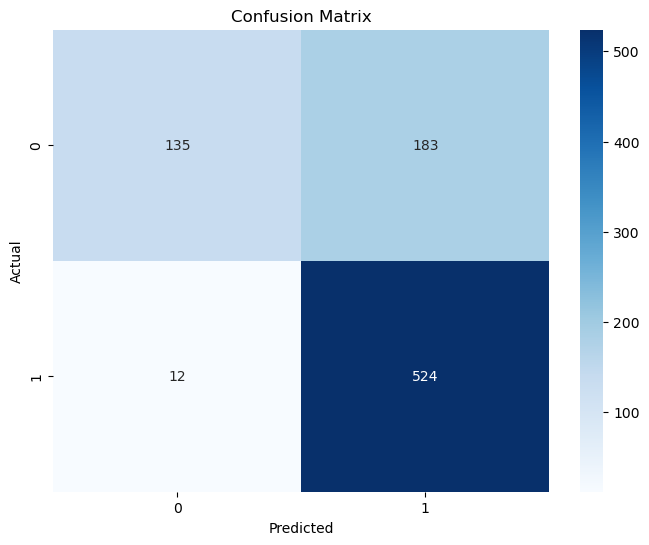

GaussianNB Classifier Metrics:
Accuracy: 0.7716627634660421
Precision: 0.807145767389433
Recall: 0.7716627634660421
F1 Score: 0.7453843966341451
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.92      0.42      0.58       318
           1       0.74      0.98      0.84       536

    accuracy                           0.77       854
   macro avg       0.83      0.70      0.71       854
weighted avg       0.81      0.77      0.75       854



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GaussianNB instance
gaussian_nb = GaussianNB()

# Train the logistic regression model
gaussian_nb.fit(x_train, y_train)

# Predict on the test set
y_pred = gaussian_nb.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GaussianNB Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("GaussianNB Report:\n", classification_rep)

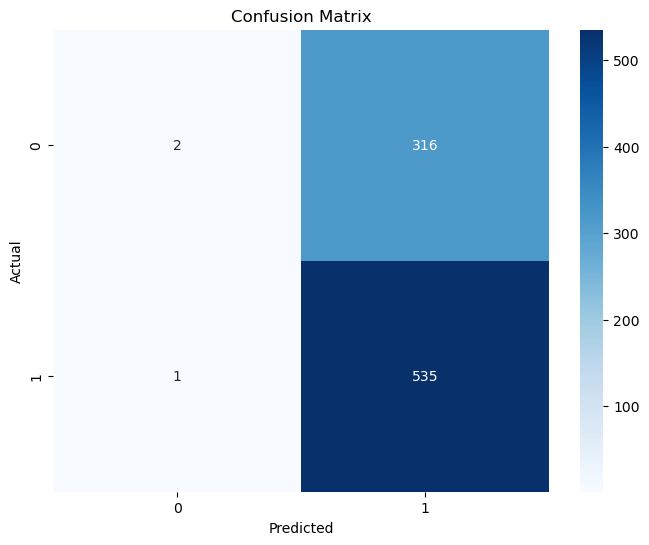

Accuracy: 0.6288056206088993
Precision: 0.6428199913588367
Recall: 0.6288056206088993
F1 Score: 0.48882830492977636
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.01      0.01       318
           1       0.63      1.00      0.77       536

    accuracy                           0.63       854
   macro avg       0.65      0.50      0.39       854
weighted avg       0.64      0.63      0.49       854



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

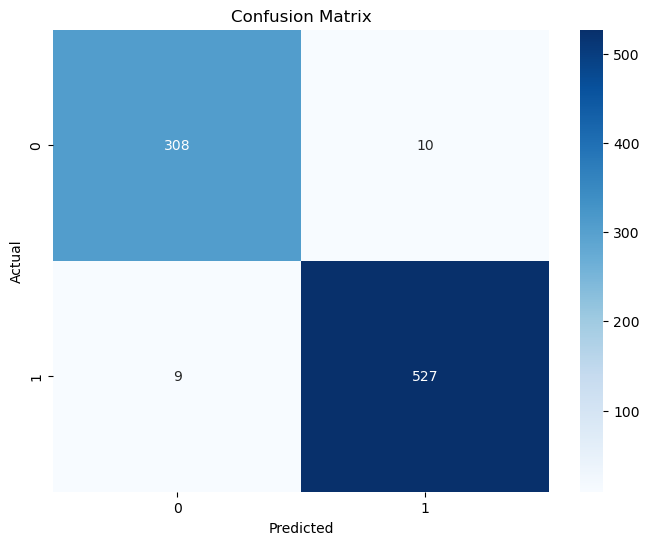

Decision Tree Classifier Metrics:
Accuracy: 0.977751756440281
Precision: 0.9777403171039073
Recall: 0.977751756440281
F1 Score: 0.9777446054465413
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

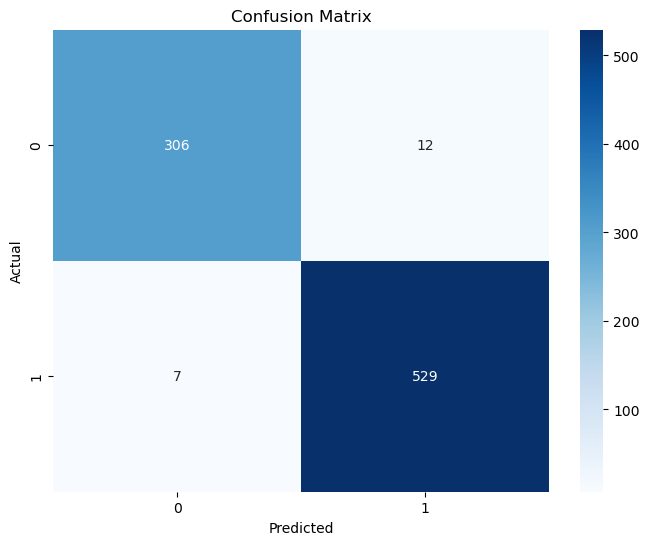

Random Forest Classifier Metrics:
Accuracy: 0.977751756440281
Precision: 0.9777506845946926
Recall: 0.977751756440281
F1 Score: 0.9777152536943943
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_

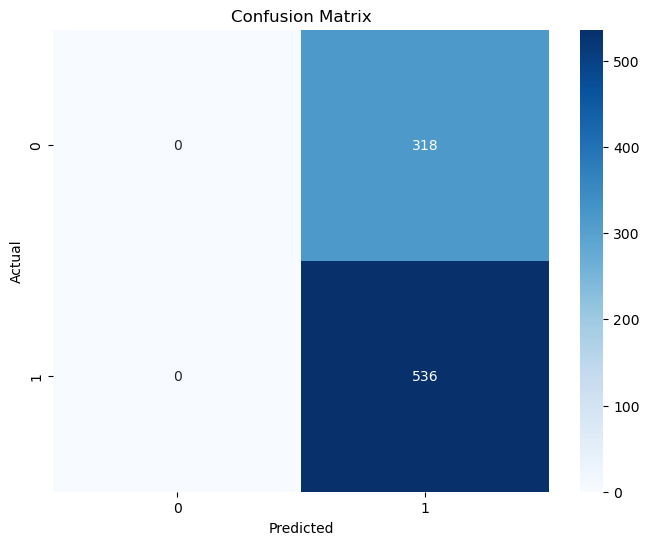

SVM Classifier Metrics:
Accuracy: 0.6276346604215457
Precision: 0.393925266962469
Recall: 0.6276346604215457
F1 Score: 0.4840462992603575
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.63      1.00      0.77       536

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

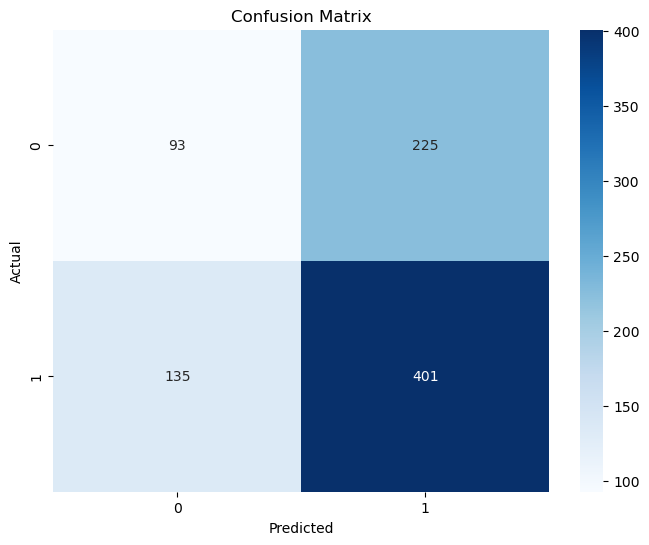

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.5784543325526932
Precision: 0.5539329849265704
Recall: 0.5784543325526932
F1 Score: 0.5600364760377176
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.29      0.34       318
           1       0.64      0.75      0.69       536

    accuracy                           0.58       854
   macro avg       0.52      0.52      0.52       854
weighted avg       0.55      0.58      0.56       854



In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

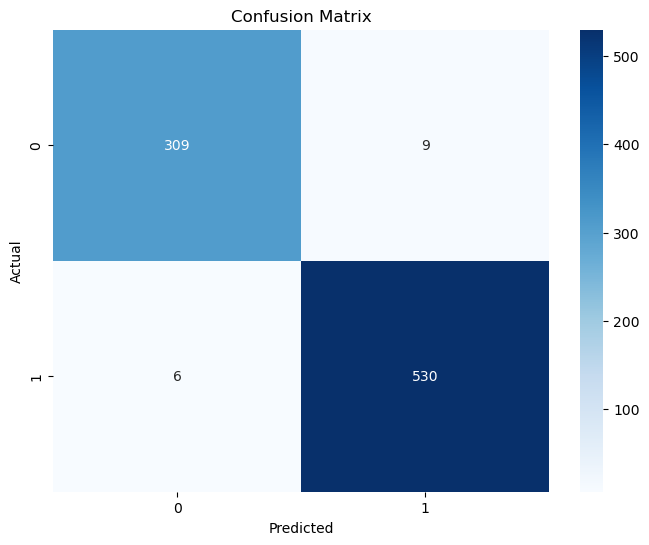

XGBoost Classifier Metrics:
Accuracy: 0.9824355971896955
Precision: 0.9824273418117514
Recall: 0.9824355971896955
F1 Score: 0.982418483851126
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [16]:
#FNN
 
from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#create model

#x_train, x_test, y_train, y_test 

model = Sequential()
#get number of columns in training data
n_cols = x_test.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model using mse as a measure of model performance
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
 
model.fit(x_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
# Predict on the test set
y_pred = model.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("FNN Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


KeyboardInterrupt



In [ ]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

#Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Predict on the test set
y_pred = model.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RNN Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [ ]:
x_train.shape

In [ ]:


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(x_train,y_train,epochs=50,batch_size=32)



  

# Predict on the test set
y_pred = regressor.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LSTM (beter version of RNN) Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)